In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
# Function to display an image without axis and with a specified colormap
def show_image(img, cmap=None):
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.show()

In [3]:
def get_coords(image):
    """This function launches a window in which the user selects points to get their coordinates. 
    It then shows the selected points on the image and returns a list of points."""
    # make a copy of the image and initialize an empty list for the points
    img = image.copy()
    points = []
    
    # defining the click event function inside the other function as the use is local
    def click_event(event, x, y, flags, params):
        # action taken when the left button is pressed
        if event == cv2.EVENT_LBUTTONDOWN:
            # print current coordinates and add to list 
            print(f"clicked at ({x},{y})")
            points.append([x, y])
            # add text to the point selected
            cv2.putText(img, f'({x},{y})', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
            cv2.circle(img, (x, y), 3, (0, 255, 255), -1)
    
    # opens a window with the image and calls the click event function
    cv2.namedWindow('Point Coordinates', cv2.WINDOW_NORMAL)
    cv2.setMouseCallback('Point Coordinates', click_event)
    
    # runs until ESC key is hit or window is closed
    while True:
        cv2.imshow('Point Coordinates', img)
        # mask the bits to clean up the keypress input
        k = cv2.waitKey(1) & 0xFF
        if k == 27:  # ESC key
            break
    cv2.destroyAllWindows()
    
    # shows the image with coords, then returns the points
    show_image(img)
    return points


In [4]:
def DLT_algo(coords1, coords2):
    """Returns the Homography matrix for the two sets of supplied coordinates. Assuming that both have the same length and are of length 2."""
    # get total number of coords
    num_pts = len(coords1)
    # converting to arrays in case supplied list of lists
    coords1 = np.array(coords1)
    coords2 = np.array(coords2)
    # construct the matrix A for the first pair of matching points
    x = coords1[0,0]
    y = coords1[0,1]
    u = coords2[0,0]
    v = coords2[0,1]
    # assuming w = 1 for both points
    Amat = np.array([[0, 0, 0, -1*x, -1*y, -1, v*x, v*y, v],
                     [x, y, 1, 0, 0, 0, -1*u*x, -1*u*y, -1*u]], dtype=np.float64)
    # iterate over the remaining points by making a temp matrix and then vertically stacking that to A
    for i in range(1,num_pts):
        x = coords1[i,0]
        y = coords1[i,1]
        u = coords2[i,0]
        v = coords2[i,1]
        Ai = np.array([[0, 0, 0, -1*x, -1*y, -1, x*v, y*v, v],
               [x, y, 1, 0, 0, 0, -1*u*x, -1*u*y, -1*u]], dtype=np.float64)

        Amat = np.append(Amat, Ai, axis=0)
    # Perform SVD on A and obtain the right singular vectors
    _, _, Vh = np.linalg.svd(Amat)
    # obtain the right singular vector associated with the lowest singular value
    h_vec = Vh[-1, :]
    # reshape that to form H, and then return it after normalizing with respect to the (3,3) entry
    H = h_vec.reshape(3,3)/h_vec[-1]
    return H


/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packag

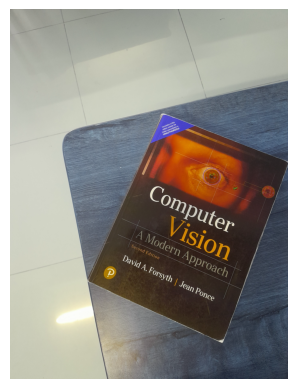

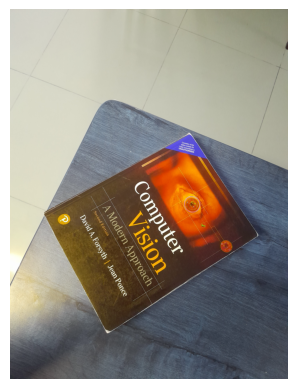

In [5]:
image1 = cv2.imread("image1.jpg", cv2.COLOR_BGR2RGB) 
image2 = cv2.imread("image2.jpg", cv2.COLOR_BGR2RGB)
show_image(image1)
show_image(image2)

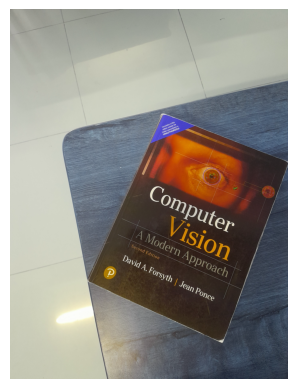

clicked at (1685,1162)
clicked at (863,3009)
clicked at (2344,3694)
clicked at (3056,1717)


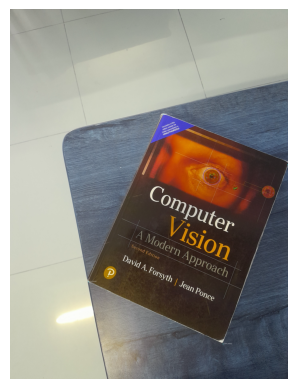

The arrays are
[[1685 1162]
 [ 863 3009]
 [2344 3694]
 [3056 1717]]



In [6]:
image1 = cv2.imread("image1.jpg", cv2.COLOR_BGR2RGB) 
show_image(image1)  # Make sure image1 is displayed before selecting points

coords_img1 = np.array(get_coords(image1))
print(f"The arrays are\n{coords_img1}\n")  # Print coords_img1 to verify

# Similarly, repeat the process for image2 if needed


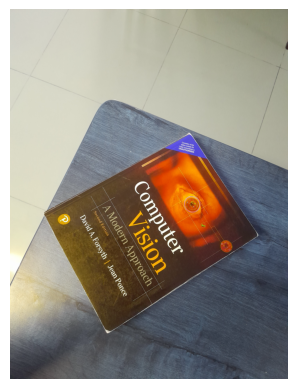

clicked at (1981,1379)
clicked at (2740,2506)
clicked at (1077,3584)
clicked at (369,2259)


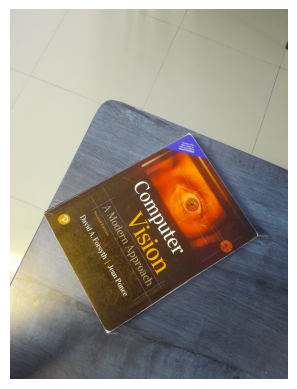

The arrays are
[[1981 1379]
 [2740 2506]
 [1077 3584]
 [ 369 2259]]



In [7]:
image1 = cv2.imread("image2.jpg", cv2.COLOR_BGR2RGB) 
show_image(image2)  # Make sure image1 is displayed before selecting points

coords_img2 = np.array(get_coords(image2))
print(f"The arrays are\n{coords_img2}\n")  # Print coords_img1 to verify

# Similarly, repeat the process for image2 if needed


In [8]:
mat_H = DLT_algo(coords_img1, coords_img2) 
print(mat_H)

[[-1.07953253e+00 -6.74454645e-02  3.73686102e+03]
 [ 2.22754080e-01  6.94457095e-01  9.81842826e+01]
 [-3.84914324e-05 -5.66443452e-06  1.00000000e+00]]


/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packag

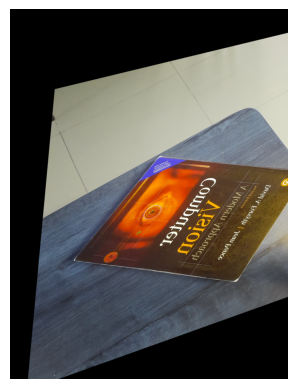

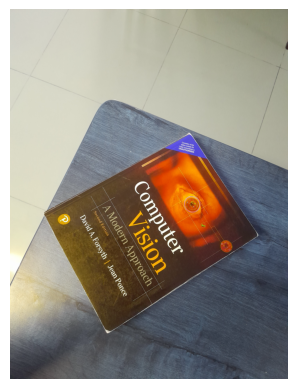

: 

In [17]:
img_homography = cv2.warpPerspective(image1, mat_H, (image2.shape[1], image1.shape[0]))
show_image(img_homography)
show_image(image1)

In [10]:
# OpenCV implementation of the same algorithm
mat_H_openCV = cv2.findHomography(coords_img1, coords_img2)[0]

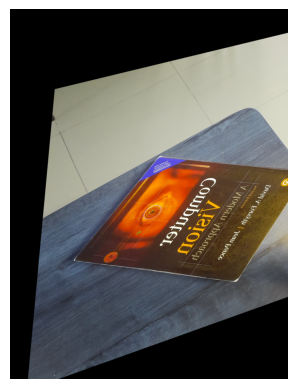

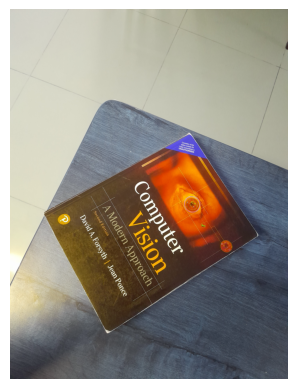

In [11]:
img_homography_openCV = cv2.warpPerspective(image1, mat_H_openCV, (image2.shape[1], image2.shape[0]))
show_image(img_homography_openCV)
show_image(image2)


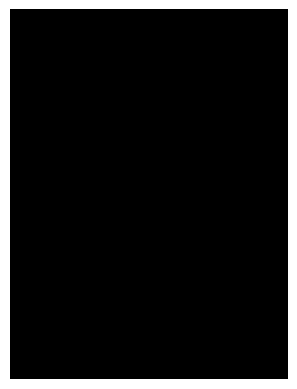

In [12]:
show_image(img_homography-img_homography_openCV)

In [13]:
# Additional code to compute the rank of the matrix of the system of equations

def compute_matrix_rank(matrix):
    """Compute the rank of a matrix."""
    return np.linalg.matrix_rank(matrix)

# Formulate the matrix A for the system of equations
A_matrix = np.zeros((2 * len(coords_img1), 9))
for i in range(len(coords_img1)):
    x, y = coords_img1[i]
    u, v = coords_img2[i]
    A_matrix[2*i] = [-x, -y, -1, 0, 0, 0, u*x, u*y, u]
    A_matrix[2*i + 1] = [0, 0, 0, -x, -y, -1, v*x, v*y, v]

# Compute rank of the matrix of the system of equations
rank_A = compute_matrix_rank(A_matrix)
print("Rank of the matrix of the system of equations:", rank_A)


Rank of the matrix of the system of equations: 8


In [14]:
def formulate_system_of_equations(coords1, coords2):
    """Formulate the system of equations for computing the homography matrix."""
    equations = []
    for i in range(len(coords1)):
        x, y = coords1[i]
        u, v = coords2[i]
        eq1 = f"{u}*({x}*h_31 + {y}*h_32 + h_33) - ({x}*h_11 + {y}*h_12 + h_13)"
        eq2 = f"{u}*({x}*h_21 + {y}*h_22 + h_23) - ({x}*h_31 + {y}*h_32 + h_33)"
        eq3 = f"{v}*({x}*h_11 + {y}*h_12 + h_13) - ({x}*h_21 + {y}*h_22 + h_23)"
        eq4 = f"{v}*({x}*h_31 + {y}*h_32 + h_33) - ({x}*h_31 + {y}*h_32 + h_33)"
        equations.append((eq1, eq2, eq3, eq4))
    return equations

# Example usage:
equations = formulate_system_of_equations(coords_img1, coords_img2)
for i, (eq1, eq2, eq3, eq4) in enumerate(equations, 1):
    print(f"Equations for correspondence pair {i}:")
    print(f"Equation 1: {eq1}")
    print(f"Equation 2: {eq2}")
    print(f"Equation 3: {eq3}")
    print(f"Equation 4: {eq4}")
    print()


Equations for correspondence pair 1:
Equation 1: 1981*(1685*h_31 + 1162*h_32 + h_33) - (1685*h_11 + 1162*h_12 + h_13)
Equation 2: 1981*(1685*h_21 + 1162*h_22 + h_23) - (1685*h_31 + 1162*h_32 + h_33)
Equation 3: 1379*(1685*h_11 + 1162*h_12 + h_13) - (1685*h_21 + 1162*h_22 + h_23)
Equation 4: 1379*(1685*h_31 + 1162*h_32 + h_33) - (1685*h_31 + 1162*h_32 + h_33)

Equations for correspondence pair 2:
Equation 1: 2740*(863*h_31 + 3009*h_32 + h_33) - (863*h_11 + 3009*h_12 + h_13)
Equation 2: 2740*(863*h_21 + 3009*h_22 + h_23) - (863*h_31 + 3009*h_32 + h_33)
Equation 3: 2506*(863*h_11 + 3009*h_12 + h_13) - (863*h_21 + 3009*h_22 + h_23)
Equation 4: 2506*(863*h_31 + 3009*h_32 + h_33) - (863*h_31 + 3009*h_32 + h_33)

Equations for correspondence pair 3:
Equation 1: 1077*(2344*h_31 + 3694*h_32 + h_33) - (2344*h_11 + 3694*h_12 + h_13)
Equation 2: 1077*(2344*h_21 + 3694*h_22 + h_23) - (2344*h_31 + 3694*h_32 + h_33)
Equation 3: 3584*(2344*h_11 + 3694*h_12 + h_13) - (2344*h_21 + 3694*h_22 + h_23)
Equa

Homography matrix obtained using DLT algorithm:
[[-1.07953253e+00 -6.74454645e-02  3.73686102e+03]
 [ 2.22754080e-01  6.94457095e-01  9.81842826e+01]
 [-3.84914324e-05 -5.66443452e-06  1.00000000e+00]]

Homography matrix obtained using findHomography function in OpenCV:
[[-1.07953253e+00 -6.74454645e-02  3.73686102e+03]
 [ 2.22754080e-01  6.94457095e-01  9.81842826e+01]
 [-3.84914324e-05 -5.66443452e-06  1.00000000e+00]]


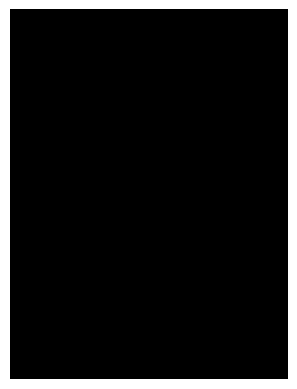

Explanation:
The difference between the two homography-transformed images (DLT and OpenCV) shows
the discrepancies between the two methods. Since the resulting difference is a full
black image, it indicates that there are minimal discrepancies between the results
obtained from the DLT algorithm and the findHomography function in OpenCV.
This suggests that the transformations applied by both methods are highly similar,
if not identical, resulting in negligible differences between the two images.
The consistency between the transformations implies that both methods effectively
align and correct distortions in the images based on the calculated homography
matrices. Possible reasons for such consistency could include accurate
implementation of the algorithms, numerical precision, and robustness of the
methods to variations in input data.


In [15]:
# Compare the results with the results of using the function findHomography in OpenCV
print("Homography matrix obtained using DLT algorithm:")
print(mat_H)

print("\nHomography matrix obtained using findHomography function in OpenCV:")
print(mat_H_openCV)

# Observe how the homography affects other parts of the image
img_homography_diff = img_homography - img_homography_openCV
show_image(img_homography_diff)

# Explanation for the effects of homography on the image
print("Explanation:")
print("The difference between the two homography-transformed images (DLT and OpenCV) shows")
print("the discrepancies between the two methods. Since the resulting difference is a full")
print("black image, it indicates that there are minimal discrepancies between the results")
print("obtained from the DLT algorithm and the findHomography function in OpenCV.")
print("This suggests that the transformations applied by both methods are highly similar,")
print("if not identical, resulting in negligible differences between the two images.")
print("The consistency between the transformations implies that both methods effectively")
print("align and correct distortions in the images based on the calculated homography")
print("matrices. Possible reasons for such consistency could include accurate")
print("implementation of the algorithms, numerical precision, and robustness of the")
print("methods to variations in input data.")


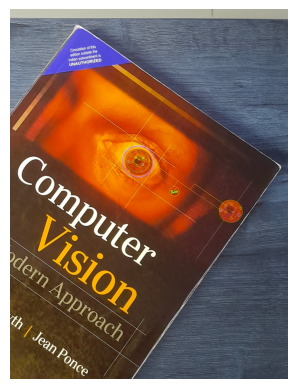

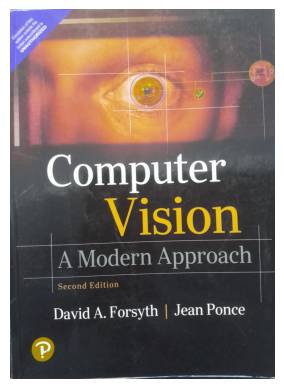

Explanation:
The computed homography matrix is applied to image1 using the DLT algorithm,
mapping the corner points of the book to the specified target coordinates.
This transformation effectively 'straightens' image1 to match the perspective
and aspect ratio observed in image3. The resulting image closely resembles
image3, demonstrating the success of the homography transformation in aligning
image1 with the desired perspective.


In [16]:
# Define the target coordinates based on the aspect ratio of the book in image1
target_coords = np.array([[0,0],[0,1800],[1350,1800],[1350,0]])

# Compute the homography matrix using the DLT algorithm to straighten image1
mat_H2 = DLT_algo(coords_img1, target_coords)

# Apply the computed homography to image1 to straighten it
img_straighten = cv2.warpPerspective(image1, mat_H2, (1350, 1800))

# Display the straightened image
show_image(img_straighten)

# Load and display image3 for comparison
image3 = cv2.imread("image3.jpg", cv2.COLOR_BGR2RGB)
show_image(image3)

# Explanation for the result
print("Explanation:")
print("The computed homography matrix is applied to image1 using the DLT algorithm,")
print("mapping the corner points of the book to the specified target coordinates.")
print("This transformation effectively 'straightens' image1 to match the perspective")
print("and aspect ratio observed in image3. The resulting image closely resembles")
print("image3, demonstrating the success of the homography transformation in aligning")
print("image1 with the desired perspective.")



1. **Image Rectification:**
   Use Case: Correcting perspective distortion in images of planar surfaces, such as buildings, documents, or whiteboards, to make them appear as if they were captured from the front.
   Demonstration:
   - Input Image: A photo of a building taken from an angle, resulting in perspective distortion.
   - Method: Compute the homography matrix to rectify the image and make the building appear frontal.
   - Output: Display the rectified image alongside the original to showcase the correction of perspective distortion.

2. **Augmented Reality (AR):**
   Use Case: Overlaying virtual objects onto a real-world scene by aligning their positions accurately with respect to the camera's viewpoint.
   Demonstration:
   - Input Images: A photo of a scene captured by a camera and an image of a virtual object.
   - Method: Compute the homography matrix to align the virtual object with the perspective of the real-world scene.
   - Output: Display the augmented reality scene by overlaying the virtual object onto the real-world scene, maintaining correct perspective and alignment.

